In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [87]:
data = pd.read_csv('C:/Users/vedan/OneDrive/Desktop/MIT/DWDM/age_by_industry.csv')

In [88]:
data

,naics,census_ind,naics_industry,min_age,max_age,avg_age
0,111,170,AGR-CROP PRODUCTION,16,92,47.927342
1,112,180,AGR-ANIMAL PRODUCTION AND AQUACULTURE,16,92,48.869432
2,1133,270,AGR-LOGGING,18,67,45.473684
3,113M,190,AGR-FORESTRY EXCEPT LOGGING,31,74,50.882353
4,114,280,"AGR-FISHING, HUNTING, AND TRAPPING",20,60,39.520000
...,...,...,...,...,...,...
261,928110P7,9870,MIL-MILITARY RESERVES OR NATIONAL GUARD,18,53,33.000000
262,928P,9590,ADM-NATIONAL SECURITY AND INTERNATIONAL AFFAIRS,17,85,44.964809
263,92M1,9490,ADM-ADMINISTRATION OF ENVIRONMENTAL QUALITY AN...,20,76,47.284615
264,92M2,9570,ADM-ADMINISTRATION OF ECONOMIC PROGRAMS AND SP...,17,79,49.823529


# Data Correlation

In [89]:
data.corr()

,census_ind,min_age,max_age,avg_age
census_ind,1.000000,-0.344935,0.225085,-0.245981
min_age,-0.344935,1.000000,-0.549043,0.221938
max_age,0.225085,-0.549043,1.000000,0.356676
avg_age,-0.245981,0.221938,0.356676,1.000000


In [90]:
#correlation analysis
data.corr()

,census_ind,min_age,max_age,avg_age
census_ind,1.000000,-0.344935,0.225085,-0.245981
min_age,-0.344935,1.000000,-0.549043,0.221938
max_age,0.225085,-0.549043,1.000000,0.356676
avg_age,-0.245981,0.221938,0.356676,1.000000


In [91]:
print(data.corr())
plt.show()

            census_ind   min_age   max_age   avg_age
census_ind    1.000000 -0.344935  0.225085 -0.245981
min_age      -0.344935  1.000000 -0.549043  0.221938
max_age       0.225085 -0.549043  1.000000  0.356676
avg_age      -0.245981  0.221938  0.356676  1.000000


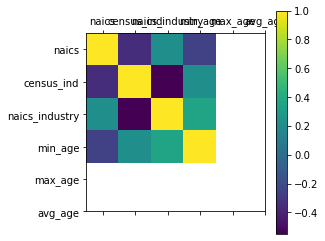

In [92]:
plt.matshow(data.corr())
plt.xticks(range(len(data.columns)), data.columns)
plt.yticks (range(len(data.columns)), data.columns)
plt.colorbar()
plt. show()

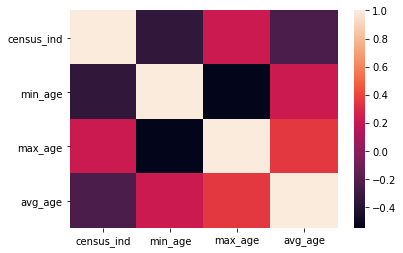

In [93]:
sns.heatmap(data.corr(method="pearson"))
plt.show()

<AxesSubplot:>

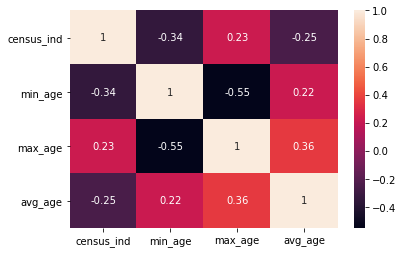

In [94]:
correlation_matrix=data.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

# Handling Data Duplication

In [43]:
#handling data duplication
data.shape

(266, 6)

In [44]:
data.duplicated(subset = None, keep =False).value_counts()

False    266
dtype: int64

In [45]:
bool_series = data.duplicated(subset = None, keep = False)

In [46]:
data_unique = data[~bool_series]

In [47]:
print("Before Removing Duplicates:")
print(data.shape)
print("After Removing Duplicates:")
print(data_unique.shape)

Before Removing Duplicates:
(266, 6)
After Removing Duplicates:
(266, 6)


In [78]:
exact_duplicate_count = df.duplicated().sum()
print("No. of duplicate values:", exact_duplicate_count)

No. of duplicate values: 0


# Data Normalization on minimum age

In [49]:
data.columns

Index(['naics', 'census_ind', 'naics_industry', 'min_age', 'max_age',
       'avg_age'],
      dtype='object')

In [50]:
min_age1=data['min_age']

In [51]:
min_age1

0      16
1      16
2      18
3      31
4      20
       ..
261    18
262    17
263    20
264    17
265    18
Name: min_age, Length: 266, dtype: int64

In [52]:
norm_minage=(min_age1-min_age1.min())/(min_age1.max()-min_age1.min())
data['norm_minage']=norm_minage
data.sort_values(by='min_age')

,naics,census_ind,naics_industry,min_age,max_age,avg_age,norm_minage
0,111,170,AGR-CROP PRODUCTION,16,92,47.927342,0.000000
189,5411,7270,PRF-LEGAL SERVICES,16,92,47.657049,0.000000
182,52M1,6870,FIN-BANKING AND RELATED ACTIVITIES,16,86,43.125512,0.000000
170,5121,6570,INF-MOTION PICTURE AND VIDEO INDUSTRIES,16,74,34.098901,0.000000
166,4MS,5790,RET-NOT SPECIFIED RETAIL TRADE,16,87,43.675676,0.000000
...,...,...,...,...,...,...,...
32,31411,1570,MFG-CARPET AND RUG MILLS,33,48,42.250000,0.586207
38,31M,1670,"MFG-KNITTING FABRIC MILLS, AND APPAREL KNITTIN...",35,61,45.000000,0.655172
186,53223,7170,FIN-VIDEO TAPE AND DISK RENTAL,36,49,42.500000,0.689655
28,3122,1390,MFG-TOBACCO,37,48,42.500000,0.724138


In [53]:
from sklearn import preprocessing

In [55]:
data.columns


Index(['naics', 'census_ind', 'naics_industry', 'min_age', 'max_age',
       'avg_age', 'norm_minage'],
      dtype='object')

In [57]:
x=data[['min_age']].values.astype(float)

In [58]:
x.max()

45.0

In [59]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data[['min_age']].values.astype(float))
df_normalized = pd.DataFrame(x_scaled)
data['norm2'] = x_scaled
data.sort_values(by='min_age')

,naics,census_ind,naics_industry,min_age,max_age,avg_age,norm_minage,norm2
0,111,170,AGR-CROP PRODUCTION,16,92,47.927342,0.000000,0.000000
189,5411,7270,PRF-LEGAL SERVICES,16,92,47.657049,0.000000,0.000000
182,52M1,6870,FIN-BANKING AND RELATED ACTIVITIES,16,86,43.125512,0.000000,0.000000
170,5121,6570,INF-MOTION PICTURE AND VIDEO INDUSTRIES,16,74,34.098901,0.000000,0.000000
166,4MS,5790,RET-NOT SPECIFIED RETAIL TRADE,16,87,43.675676,0.000000,0.000000
...,...,...,...,...,...,...,...,...
32,31411,1570,MFG-CARPET AND RUG MILLS,33,48,42.250000,0.586207,0.586207
38,31M,1670,"MFG-KNITTING FABRIC MILLS, AND APPAREL KNITTIN...",35,61,45.000000,0.655172,0.655172
186,53223,7170,FIN-VIDEO TAPE AND DISK RENTAL,36,49,42.500000,0.689655,0.689655
28,3122,1390,MFG-TOBACCO,37,48,42.500000,0.724138,0.724138


# zscore normalization

In [97]:
from scipy import stats
data['zscore']=stats.zscore(data['min_age'])
data.sort_values(by='min_age')

,naics,census_ind,naics_industry,min_age,max_age,avg_age,zscore
0,111,170,AGR-CROP PRODUCTION,16,92,47.927342,-0.829538
189,5411,7270,PRF-LEGAL SERVICES,16,92,47.657049,-0.829538
182,52M1,6870,FIN-BANKING AND RELATED ACTIVITIES,16,86,43.125512,-0.829538
170,5121,6570,INF-MOTION PICTURE AND VIDEO INDUSTRIES,16,74,34.098901,-0.829538
166,4MS,5790,RET-NOT SPECIFIED RETAIL TRADE,16,87,43.675676,-0.829538
...,...,...,...,...,...,...,...
32,31411,1570,MFG-CARPET AND RUG MILLS,33,48,42.250000,3.594011
38,31M,1670,"MFG-KNITTING FABRIC MILLS, AND APPAREL KNITTIN...",35,61,45.000000,4.114428
186,53223,7170,FIN-VIDEO TAPE AND DISK RENTAL,36,49,42.500000,4.374637
28,3122,1390,MFG-TOBACCO,37,48,42.500000,4.634845


# Data Transformation

In [108]:
sorted_data = data.sort_values(by=['min_age'])
sorted_data

,naics,census_ind,naics_industry,min_age,max_age,avg_age,zscore
0,111,170,AGR-CROP PRODUCTION,16,92,47.927342,-0.829538
189,5411,7270,PRF-LEGAL SERVICES,16,92,47.657049,-0.829538
182,52M1,6870,FIN-BANKING AND RELATED ACTIVITIES,16,86,43.125512,-0.829538
170,5121,6570,INF-MOTION PICTURE AND VIDEO INDUSTRIES,16,74,34.098901,-0.829538
166,4MS,5790,RET-NOT SPECIFIED RETAIL TRADE,16,87,43.675676,-0.829538
...,...,...,...,...,...,...,...
32,31411,1570,MFG-CARPET AND RUG MILLS,33,48,42.250000,3.594011
38,31M,1670,"MFG-KNITTING FABRIC MILLS, AND APPAREL KNITTIN...",35,61,45.000000,4.114428
186,53223,7170,FIN-VIDEO TAPE AND DISK RENTAL,36,49,42.500000,4.374637
28,3122,1390,MFG-TOBACCO,37,48,42.500000,4.634845


In [110]:
sorted_data = data.sort_values(by=['avg_age'])
sorted_data

,naics,census_ind,naics_industry,min_age,max_age,avg_age,zscore
260,928110P6,9790,"MIL-U.S. ARMED FORCES, BRANCH NOT SPECIFIED",18,52,26.604651,-0.309120
96,33MS,2990,MFG-NOT SPECIFIED METAL INDUSTRIES,22,32,27.000000,0.731715
258,928110P4,9770,MIL-U.S. MARINES,18,42,27.400000,-0.309120
256,928110P2,9680,MIL-U.S. AIR FORCE,18,54,27.893004,-0.309120
259,928110P5,9780,MIL-U.S. COAST GUARD,18,41,28.750000,-0.309120
...,...,...,...,...,...,...,...
243,8122,9080,"SRV-FUNERAL HOMES, CEMETERIES AND CREMATORIES",20,92,51.330579,0.211297
108,4241,4370,WHL-PAPER AND PAPER PRODUCTS MERCHANT WHOLESALERS,23,66,51.431818,0.991923
35,3159,1690,MFG-APPAREL ACCESSORIES AND OTHER APPAREL,30,66,52.375000,2.813384
8,2122,390,EXT-METAL ORE MINING,24,64,52.714286,1.252132


In [96]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
def labelencoding(feat, data):
    le = preprocessing.LabelEncoder()
    data[feat] = le.fit_transform(data[feat])
    print(data[feat].value_counts())

In [104]:
labelencoding('naics_industry', df)

265    1
83     1
97     1
96     1
95     1
      ..
171    1
170    1
169    1
168    1
0      1
Name: naics_industry, Length: 266, dtype: int64


# Data Histogram

In [62]:
df = pd.DataFrame(data) 

In [63]:
df.min_age.unique() 

array([16, 18, 31, 20, 19, 30, 24, 21, 22, 23, 17, 37, 45, 29, 28, 33, 35,
       26, 36], dtype=int64)

<AxesSubplot:ylabel='Frequency'>

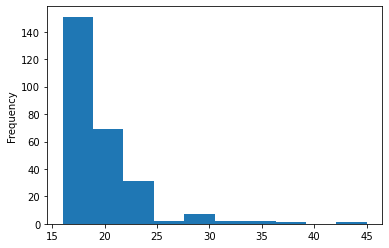

In [67]:
df['min_age'].plot(kind='hist')

In [80]:
df.max_age.unique() 

array([92, 67, 74, 60, 87, 86, 66, 64, 75, 80, 81, 73, 83, 63, 76, 78, 70,
       65, 57, 72, 48, 50, 41, 61, 71, 58, 85, 77, 84, 69, 88, 68, 79, 82,
       62, 32, 49, 54, 42, 52, 53], dtype=int64)

<AxesSubplot:ylabel='Frequency'>

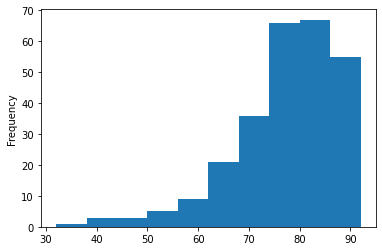

In [81]:
df['max_age'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

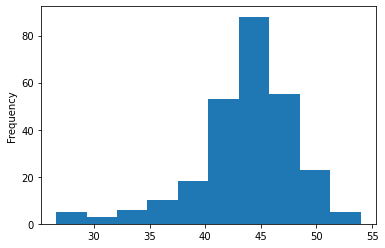

In [82]:
df['avg_age'].plot(kind='hist')